# CESM 1.2.1 Component Performance for B1850CN_f05g16


* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [2]:
!date
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['hatch.color']='g'
import xarray as xr
import pandas as pd
import os, sys, glob
from subprocess import check_output

import geoxarray
from geoplots import mapplot

Tue Feb  6 12:08:01 EST 2018


In [94]:
def get_dataframe(cases=None):
    if cases is None:
        cases = glob.glob('test_*_tigercpu*') + glob.glob('test/test_*_tigercpu*')
        
    comps = ('atm', 'ocn', 'cpl', 'lnd', 'ice', 'rof')
    pes_names = [f'{comp}_pes' for comp in comps]
    speeds_names = [f'{comp}_speed' for comp in comps]
    columns = ('case', 'tot_pes', 'tot_speed', 'tot_throughput', 'tot_cost') + tuple(pes_names) + tuple(speeds_names)


    records = []
    for case in cases:
        timing_logs = glob.glob(f'{case}/timing/ccsm_timing.*')
        for tlog in timing_logs:
            s = check_output(f'cat {tlog} |grep "total pes active"', shell=True) \
                .decode('utf-8') \
                .strip() \
                .split()[4]
            tot_pes = int(s)

            s = check_output(f'cat {tlog} |grep "TOT Run Time:"', shell=True) \
                .decode('utf-8') \
                .strip() \
                .split()[5]
            tot_speed = float(s)

            s = check_output(f'cat {tlog} |grep "Model Throughput:"', shell=True) \
                .decode('utf-8') \
                .strip() \
                .split()[2]
            tot_throughput = float(s)

            s = check_output(f'cat {tlog} |grep "Model Cost:"', shell=True) \
                .decode('utf-8') \
                .strip() \
                .split()[2]
            tot_cost = float(s)


            pes = [int(check_output(f'cat {tlog} |grep "{comp} ="', shell=True) \
                .decode('utf-8') \
                .strip() \
                .split()[3])
                for comp in comps]
            speeds = [float(check_output(f'cat {tlog} |grep "{comp.upper()} Run Time:"', shell=True) \
                .decode('utf-8') \
                .strip() \
                .split()[5])
                for comp in comps]

            record = (case, tot_pes, tot_speed, tot_throughput, tot_cost) + tuple(pes) + tuple(speeds)
            records.append(record)

    df =  pd.DataFrame(records, columns=columns)
    return df


refresh_csv = False
csv_file = 'cesm1_2_1_performance_on_tigercpu.csv'
if refresh_csv:
    df = get_dataframe()
    df.to_csv(csv_file)
else:
    df = pd.read_csv(csv_file)

<IPython.core.display.Javascript object>


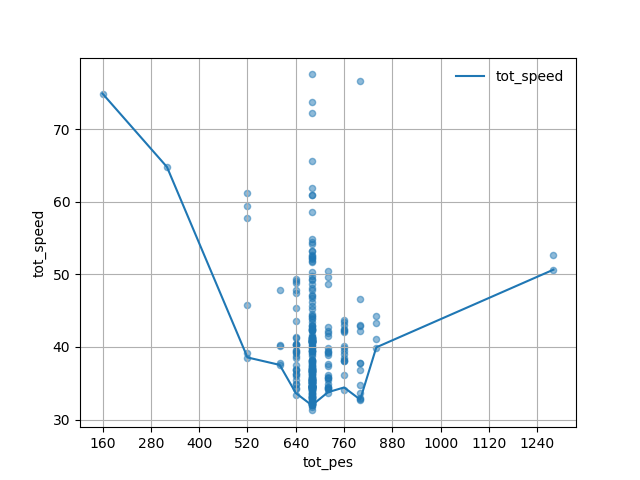

In [118]:
comp ='tot'
ax = df.plot.scatter(f'{comp}_pes', f'{comp}_speed', alpha=0.5)
df.groupby(f'{comp}_pes').quantile(0.01).plot(y=f'{comp}_speed', ax=ax)
plt.xticks(range(160,1241,120))
plt.grid(True)

<IPython.core.display.Javascript object>


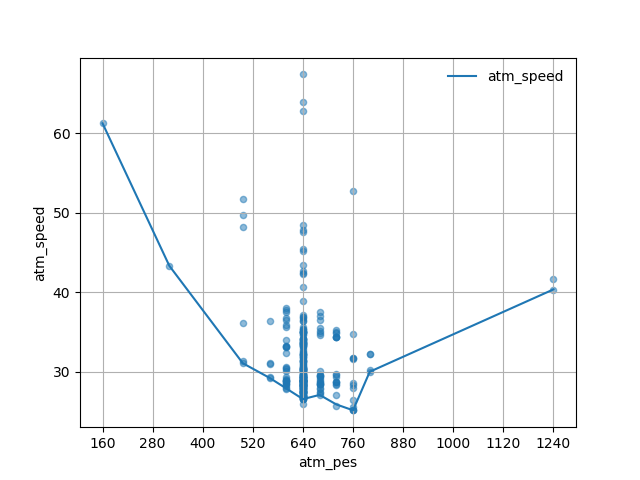

In [117]:
comp ='atm'
ax = df.plot.scatter(f'{comp}_pes', f'{comp}_speed', alpha=0.5)
df.groupby(f'{comp}_pes').quantile(0.01).plot(y=f'{comp}_speed', ax=ax)
plt.xticks(range(160,1241,120))
plt.grid(True)

<IPython.core.display.Javascript object>


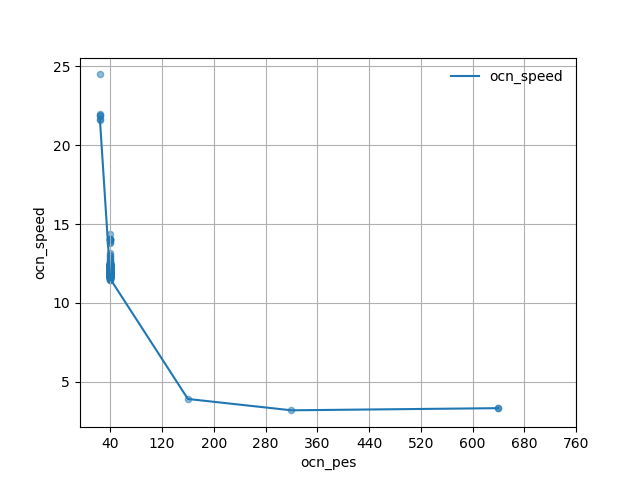

In [112]:
comp ='ocn'
ax = df.plot.scatter(f'{comp}_pes', f'{comp}_speed', alpha=0.5)
df.groupby(f'{comp}_pes').quantile(0.01).plot(y=f'{comp}_speed', ax=ax)
plt.xticks(range(40,801,80))
plt.grid(True)

<IPython.core.display.Javascript object>


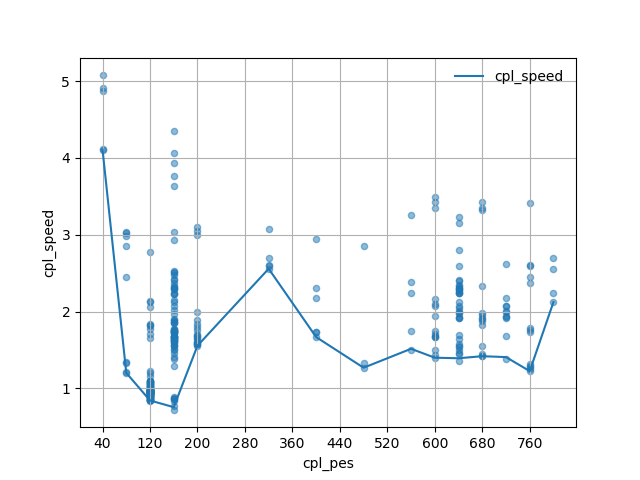

In [111]:
comp ='cpl'
ax = df.plot.scatter(f'{comp}_pes', f'{comp}_speed', alpha=0.5)
df.groupby(f'{comp}_pes').quantile(0.01).plot(y=f'{comp}_speed', ax=ax)
plt.xticks(range(40,801,80))
plt.grid(True)

<IPython.core.display.Javascript object>


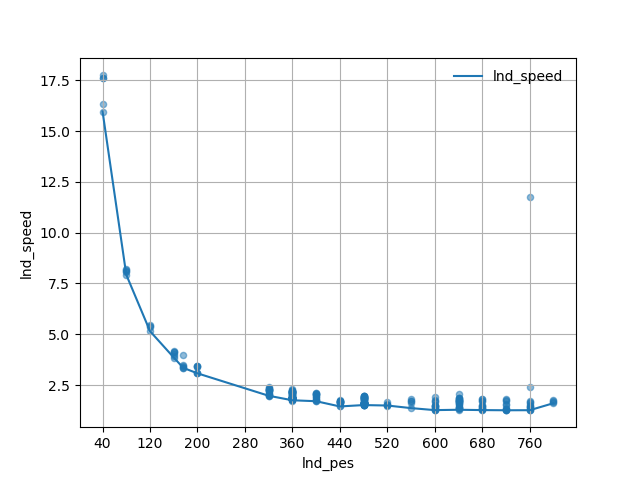

In [110]:
comp ='lnd'
ax = df.plot.scatter(f'{comp}_pes', f'{comp}_speed', alpha=0.5)
df.groupby(f'{comp}_pes').quantile(0.01).plot(y=f'{comp}_speed', ax=ax)
plt.xticks(range(40,801,80))
plt.grid(True)

<IPython.core.display.Javascript object>


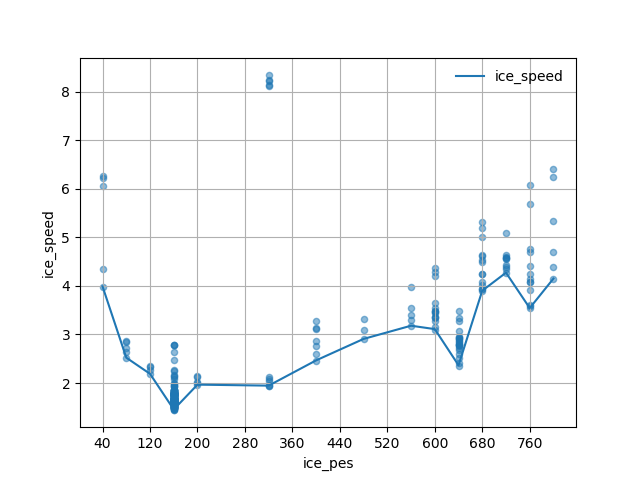

In [109]:
comp ='ice'
ax = df.plot.scatter(f'{comp}_pes', f'{comp}_speed', alpha=0.5)
df.groupby(f'{comp}_pes').quantile(0.01).plot(y=f'{comp}_speed', ax=ax)
plt.xticks(range(40,801,80))
plt.grid(True)

<IPython.core.display.Javascript object>


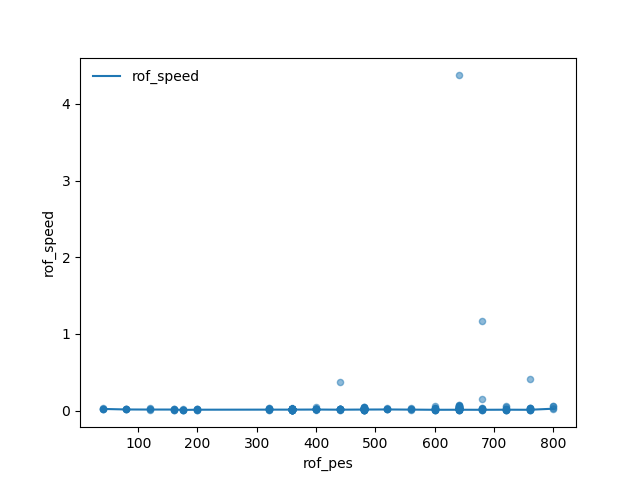

In [107]:
comp ='rof'
ax = df.plot.scatter(f'{comp}_pes', f'{comp}_speed', alpha=0.5)
df.groupby(f'{comp}_pes').quantile(0.01).plot(y=f'{comp}_speed', ax=ax)

## Codes below are DEPRECATED! 

In [111]:
# Deprecated! See codes above.
def get_comp_perform_by_case(case, comp):
    # case = 'test_a640o40l360i160c120_B1850CN_f05g16FLORish_tigercpu'
    # comp = 'atm'
    tlist = []
    timing_logs = glob.glob(f'{case}/timing/ccsm_timing.*')
    # print(timing_logs)
    for tlg in timing_logs:
        s = check_output(f'cat {tlg} |grep "{comp.lower()} ="', shell=True).decode('utf-8')
        n_pes = int( s.split()[3] )
        # print(s, n_pes)
        s = check_output(f'cat {tlg} |grep "{comp.upper()} Run Time:"', shell=True).decode('utf-8')
        t = float( s.split()[5])
        # print(s, t)
        tlist.append((n_pes, t))
    # print(tlist)
    return tlist
# print(get_comp_perform_by_case('test_a640o40l360i160c120_B1850CN_f05g16FLORish_tigercpu', 'atm'))

def get_comp_perform_for_cases(cases, comp):
    tlist = []
    for case in cases:
        tlist += get_comp_perform_by_case(case, comp)
    df = pd.DataFrame(tlist, columns=['n_pes', 'seconds_per_mday'])
    return df

### ATM

In [112]:
cases = glob.glob('test_*_B1850CN_f05g16FLORish_*')
comp = 'atm'
df = get_comp_perform_for_cases(cases, comp)

In [113]:
cases_fast = glob.glob('test_*_B1850CN_f05g16FLORish_*_fast')
comp = 'atm'
df_fast = get_comp_perform_for_cases(cases_fast, comp)

<IPython.core.display.Javascript object>


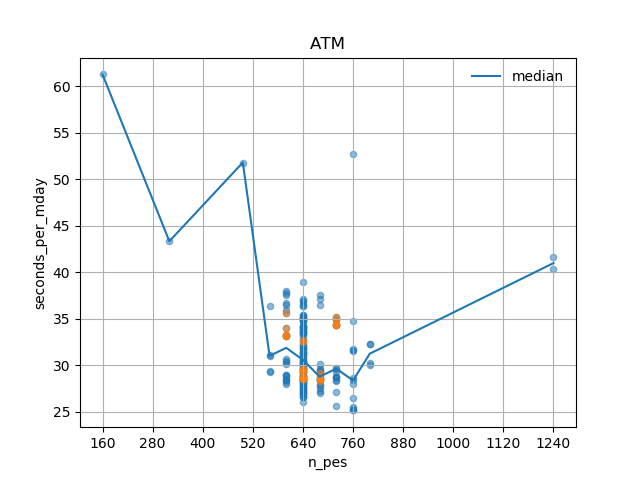

In [114]:
ax = df.plot.scatter('n_pes', 'seconds_per_mday', alpha=0.5)
df_fast.plot.scatter('n_pes', 'seconds_per_mday', ax=ax, color='C1', alpha=0.5)
df.groupby('n_pes').median().rename(columns={'seconds_per_mday':'median'}).plot(ax=ax,
    title=comp.upper())
# df.groupby('n_pes').min().rename(columns={'time_per_mday':'min'}).plot(ax=ax)
plt.xticks(range(160, 1241, 120))
plt.grid(True)


### OCN

In [82]:
cases = glob.glob('test_*_B1850CN_f05g16FLORish_*')
comp = 'ocn'
df = get_comp_perform_for_cases(cases, comp)

<IPython.core.display.Javascript object>


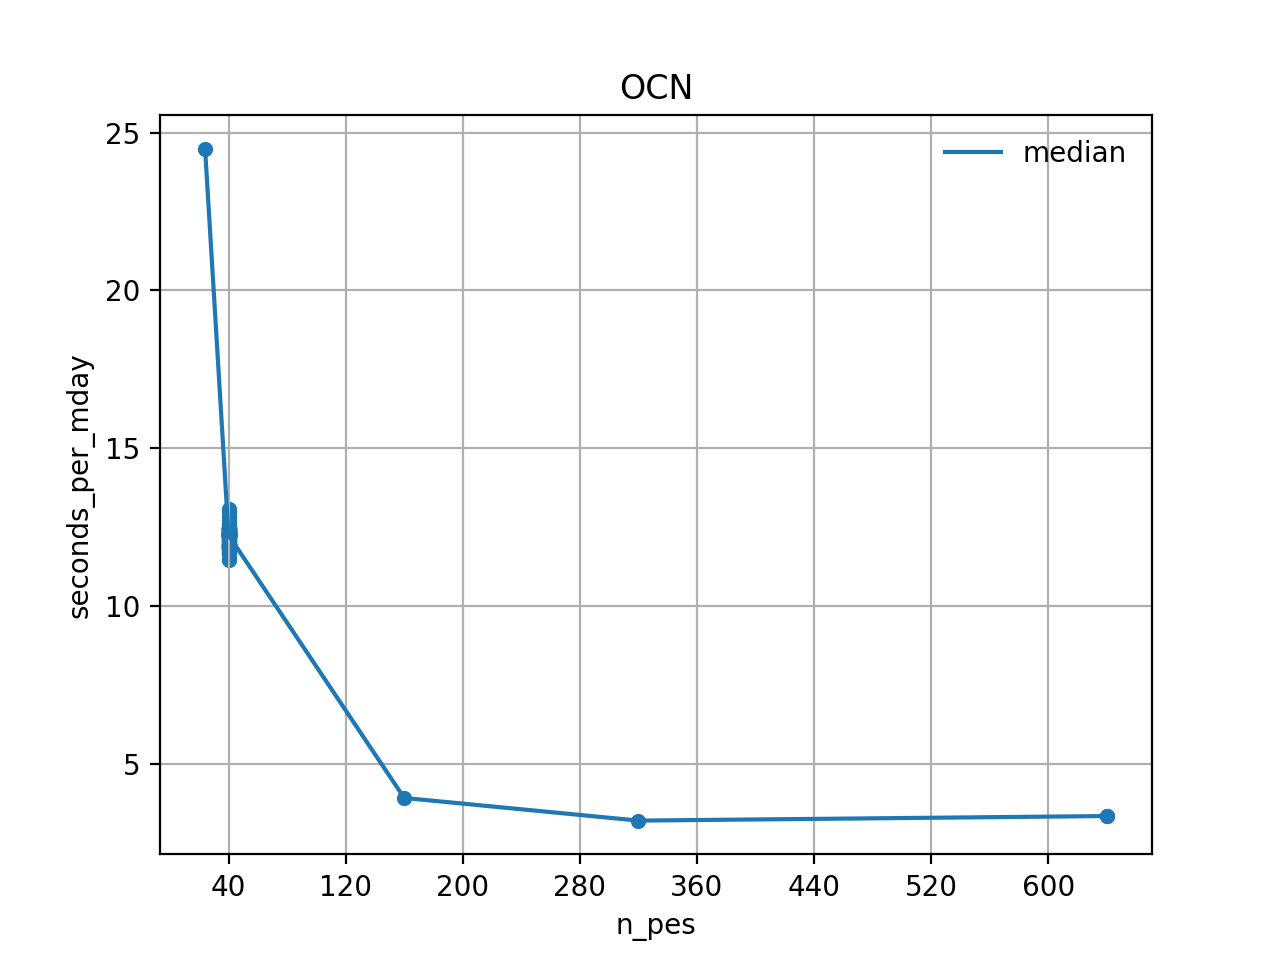

In [83]:
ax = df.plot.scatter('n_pes', 'seconds_per_mday')
df.groupby('n_pes').median().rename(columns={'seconds_per_mday':'median'}).plot(ax=ax,
    title=comp.upper())
# df.groupby('n_pes').min().rename(columns={'time_per_mday':'min'}).plot(ax=ax)
plt.xticks(range(40, 641, 80))
plt.grid(True)


### ICE

In [80]:
cases = glob.glob('test_*_B1850CN_f05g16FLORish_*')
comp = 'ice'
df = get_comp_perform_for_cases(cases, comp)

<IPython.core.display.Javascript object>


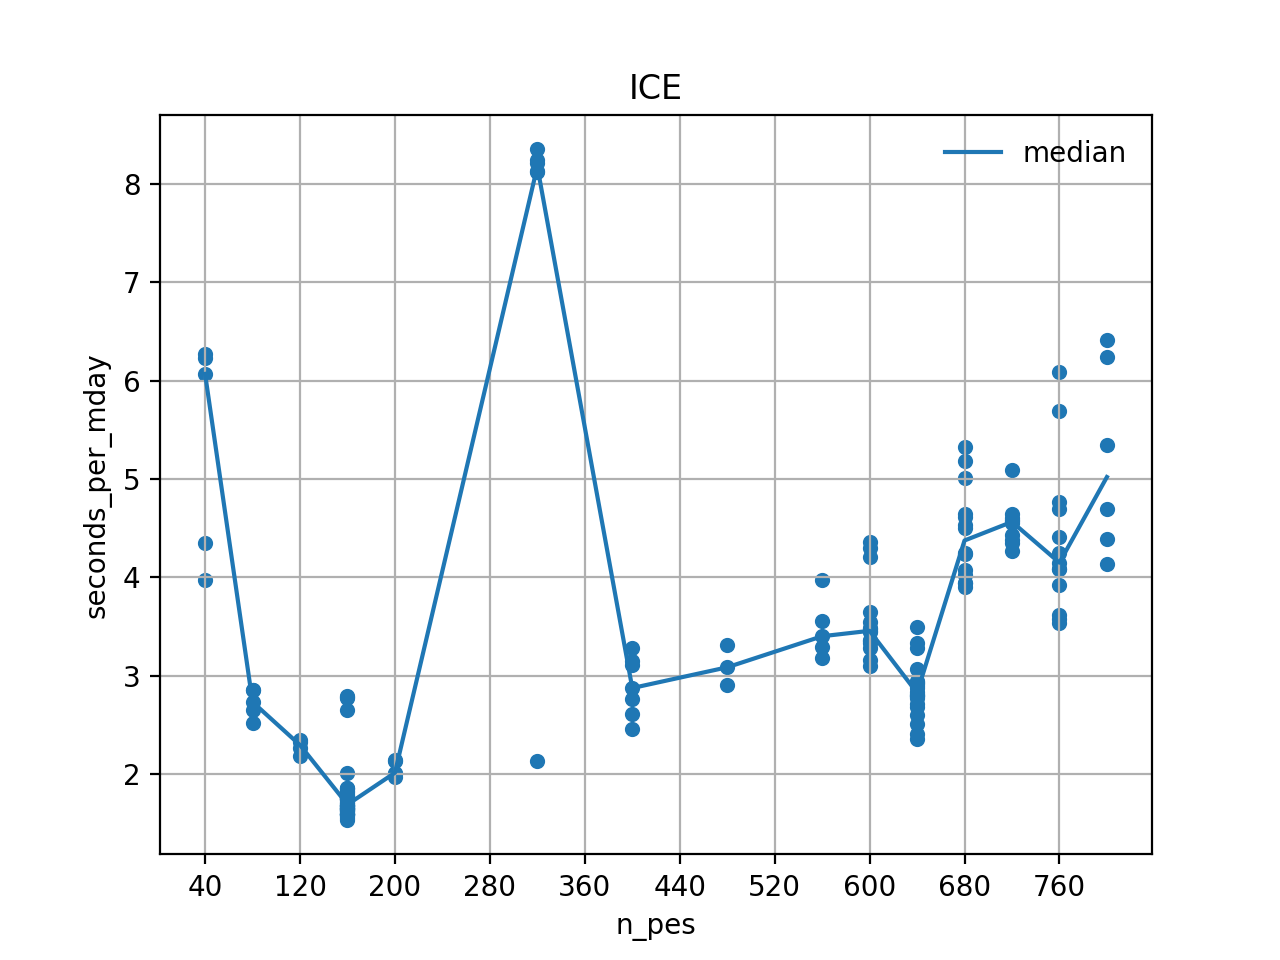

In [81]:
ax = df.plot.scatter('n_pes', 'seconds_per_mday')
df.groupby('n_pes').median().rename(columns={'seconds_per_mday':'median'}).plot(ax=ax,
    title=comp.upper())
# df.groupby('n_pes').min().rename(columns={'time_per_mday':'min'}).plot(ax=ax)
plt.xticks(range(40, 801, 80))
plt.grid(True)


### LND

In [77]:
cases = glob.glob('test_*_B1850CN_f05g16FLORish_*')
comp = 'lnd'
df = get_comp_perform_for_cases(cases, comp)

<IPython.core.display.Javascript object>


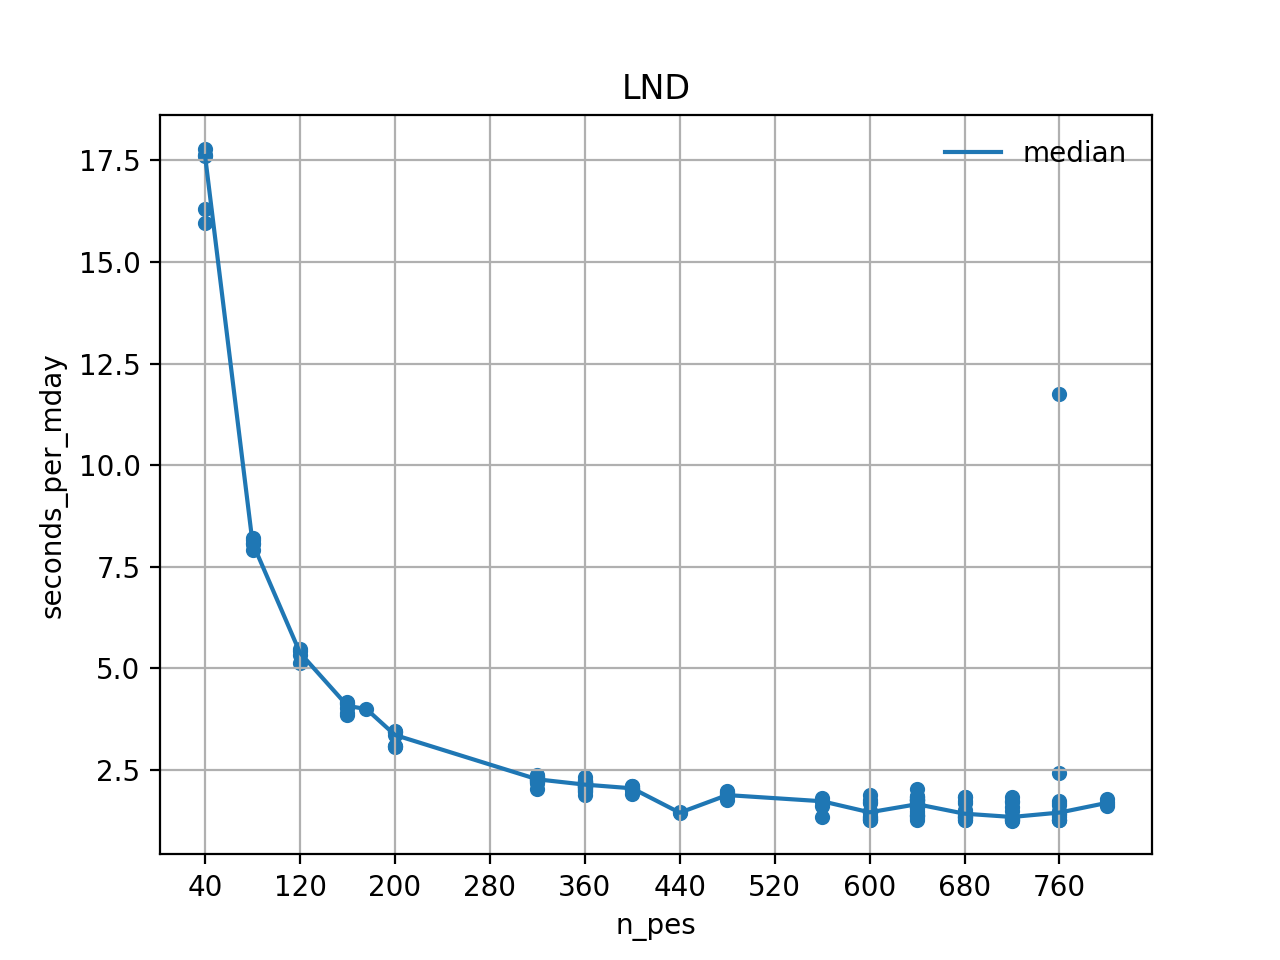

In [79]:
ax = df.plot.scatter('n_pes', 'seconds_per_mday')
df.groupby('n_pes').median().rename(columns={'seconds_per_mday':'median'}).plot(ax=ax,
    title=comp.upper())
# df.groupby('n_pes').min().rename(columns={'time_per_mday':'min'}).plot(ax=ax)
plt.xticks(range(40, 801, 80))
plt.grid(True)


### CPL

In [89]:
cases = glob.glob('test_*_B1850CN_f05g16FLORish_*')
comp = 'cpl'
df = get_comp_perform_for_cases(cases, comp)

<IPython.core.display.Javascript object>


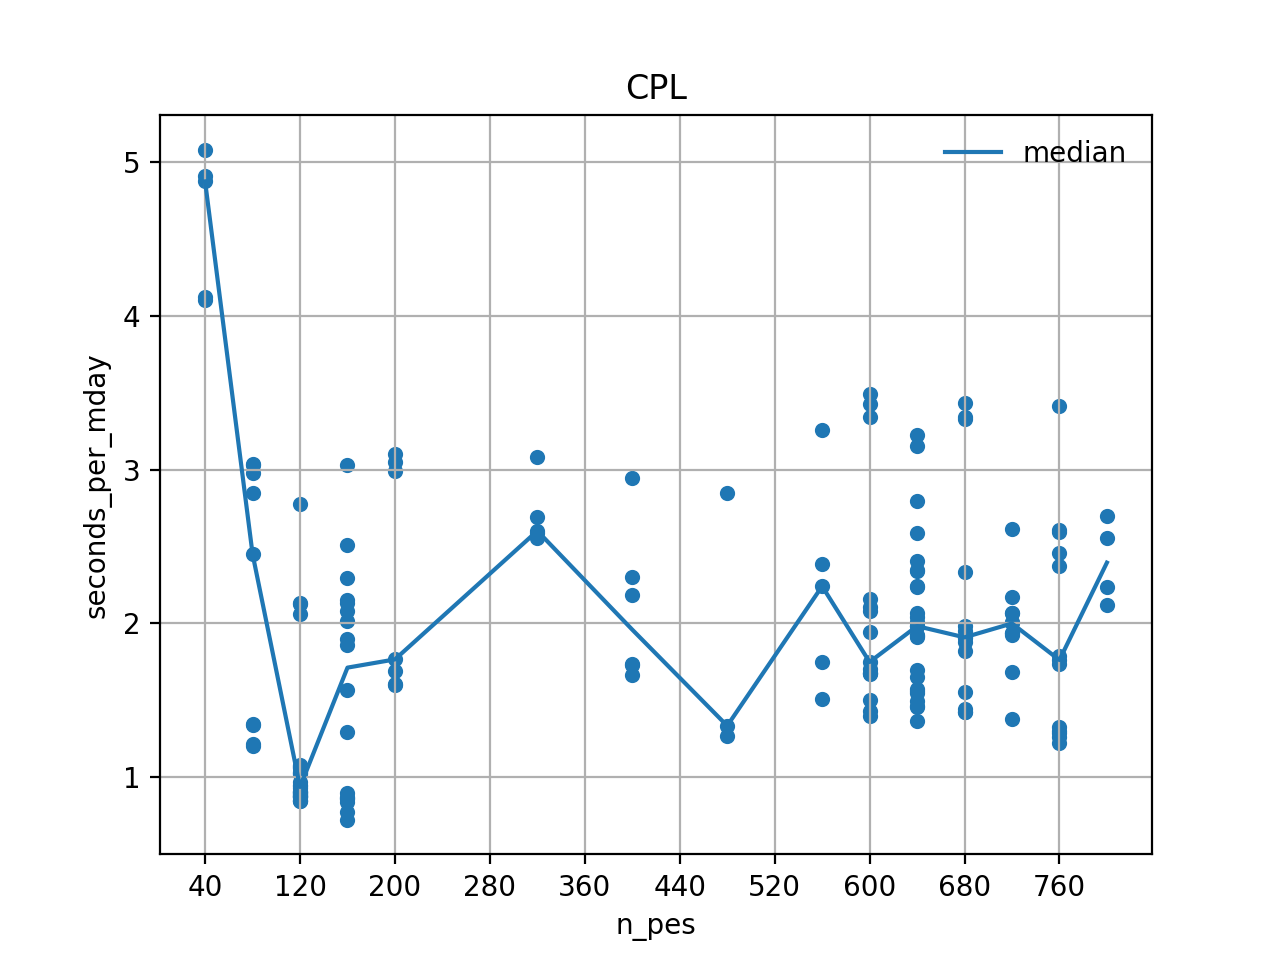

In [92]:
ax = df.plot.scatter('n_pes', 'seconds_per_mday')
df.groupby('n_pes').median().rename(columns={'seconds_per_mday':'median'}).plot(ax=ax,
    title=comp.upper())
# df.groupby('n_pes').min().rename(columns={'time_per_mday':'min'}).plot(ax=ax)
plt.xticks(range(40, 801, 80))
plt.grid(True)
